# **Data Exploration**

170498071/170498071 [==============================] - 11s 0us/step
Train Images Shape: (50000, 32, 32, 3)
Test Images Shape: (10000, 32, 32, 3)

Train Class Distribution:
0    5000.0
1    5000.0
2    5000.0
3    5000.0
4    5000.0
5    5000.0
6    5000.0
7    5000.0
8    5000.0
9    5000.0
dtype: float32

Test Class Distribution:
0    1000.0
1    1000.0
2    1000.0
3    1000.0
4    1000.0
5    1000.0
6    1000.0
7    1000.0
8    1000.0
9    1000.0
dtype: float32


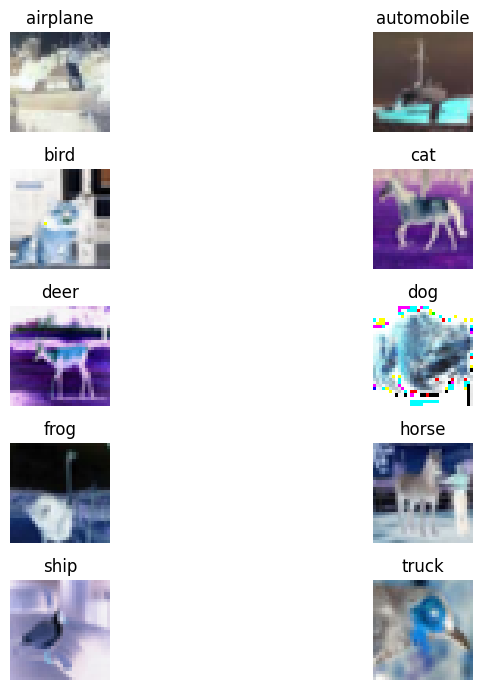


No missing images found in training data.

No missing images found in test data.


In [ ]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Step 1: Get Basic Information
print("Train Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)


# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Class distribution exploration (using pandas)
train_labels = pd.Series(train_labels.sum(axis=0)).sort_values(ascending=False)
test_labels = pd.Series(test_labels.sum(axis=0)).sort_values(ascending=False)
# Print class distribution and basic statistics
print("\nTrain Class Distribution:")
print(train_labels)

print("\nTest Class Distribution:")
print(test_labels)

# Step 2: Visualize Images
def visualize_classes(images, class_names):
  """Visualizes all classes with their corresponding names."""
  num_classes = len(class_names)
  rows, cols = 5, 2

  plt.figure(figsize=(10, (rows * 3) // 2))
  for i in range(num_classes):
    image_index = np.random.randint(len(images))
    image = images[image_index]
    image = image * 255

    plt.subplot(rows, cols, i + 1)
    plt.imshow(image)
    plt.title(class_names[i])
    plt.axis('off')

  plt.tight_layout()
  plt.show()

# Class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Visualize classes using training images
visualize_classes(train_images, class_names)

# Step 3: Check for Missing Values
missing_train_images = np.isnan(train_images).any(axis=(1, 2, 3))
missing_test_images = np.isnan(test_images).any(axis=(1, 2, 3))

num_missing_train = np.sum(missing_train_images)
num_missing_test = np.sum(missing_test_images)

if num_missing_train > 0:
  print(f"\nWarning: Found {num_missing_train} missing images in training data!")
else:
  print("\nNo missing images found in training data.")

if num_missing_test > 0:
  print(f"Warning: Found {num_missing_test} missing images in test data!")
else:
  print("\nNo missing images found in test data.")

# **CNN** Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Save the model as a .h5 file
model.save('cnn_model.h5')

Epoch 1/10
1563/1563 [==============================] - 16s 7ms/step - loss: 1.5212 - accuracy: 0.4488 - val_loss: 1.2953 - val_accuracy: 0.5410
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1644 - accuracy: 0.5887 - val_loss: 1.0851 - val_accuracy: 0.6139
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0044 - accuracy: 0.6467 - val_loss: 0.9671 - val_accuracy: 0.6575
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8949 - accuracy: 0.6860 - val_loss: 0.9347 - val_accuracy: 0.6712
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8203 - accuracy: 0.7155 - val_loss: 0.8704 - val_accuracy: 0.7028
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7615 - accuracy: 0.7334 - val_loss: 0.8844 - val_accuracy: 0.6918
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7043 - accuracy: 0.7530 - val_loss: 0.8534 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 3ms/step - loss: 0.8839 - accuracy: 0.7094
Test Accuracy: 0.7093999981880188
Model architecture saved as 'model_architecture.png'
1/1 [==============================] - 0s 238ms/step


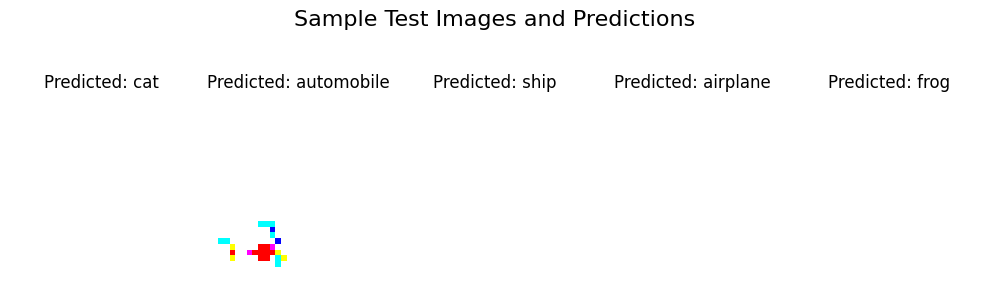

In [ ]:
from tensorflow.keras.utils import plot_model

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)
print("Model architecture saved as 'model_architecture.png'")

# Make predictions on a few test images
predictions = model.predict(x_test[:5])  # Predict for the first 5 test images

# Convert predicted class indices to class names
predicted_classes = np.argmax(predictions, axis=1)
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predicted_class_names = [class_names[i] for i in predicted_classes]

# Display the first 5 test images with their predicted class names
plt.figure(figsize=(10, 6))
for i in range(5):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i] * 255.0)  # Rescale back to 0-255 for visualization
  plt.title(f"Predicted: {predicted_class_names[i]}")
  plt.axis('off')

plt.suptitle("Sample Test Images and Predictions", fontsize=16)
plt.tight_layout()
plt.show()

# CNN Model **Improved using Optuna**

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.5 MB/s eta 0:00:00


In [ ]:
import optuna

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model(trial):
    model = models.Sequential()

    # Hyperparameters to tune
    num_conv_layers = trial.suggest_int('num_conv_layers', 1, 3)
    for i in range(num_conv_layers):
        num_filters = trial.suggest_int(f'num_filters_{i}', 32, 128, step=32)
        if i == 0:
            model.add(layers.Conv2D(num_filters, (3, 3), activation='relu', input_shape=(32, 32, 3)))
        else:
            model.add(layers.Conv2D(num_filters, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    num_dense_units = trial.suggest_int('num_dense_units', 64, 256, step=64)
    model.add(layers.Dense(num_dense_units, activation='relu'))

    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def objective(trial):
    model = create_model(trial)

    # Train the model
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64, verbose=0)

    # Evaluate the model
    score = model.evaluate(x_test, y_test, verbose=0)
    return score[1]  # Return the accuracy

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Get the best trial
best_trial = study.best_trial
print(f"Best trial: {best_trial.params}")

# Retrain the model with the best hyperparameters
best_model = create_model(best_trial)
best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
best_model.save('cnn_model_best.h5')

[I 2024-06-05 22:00:41,499] A new study created in memory with name: no-name-2215adfd-4850-4ba0-95e1-24e4ba94e9f5
[I 2024-06-05 22:01:26,740] Trial 0 finished with value: 0.5812000036239624 and parameters: {'num_conv_layers': 2, 'num_filters_0': 32, 'num_filters_1': 96, 'num_dense_units': 256, 'dropout_rate': 0.4358049825887552, 'lr': 0.005573600479581989}. Best is trial 0 with value: 0.5812000036239624.
[I 2024-06-05 22:02:53,816] Trial 1 finished with value: 0.6820999979972839 and parameters: {'num_conv_layers': 3, 'num_filters_0': 96, 'num_filters_1': 64, 'num_filters_2': 32, 'num_dense_units': 256, 'dropout_rate': 0.19391802414961462, 'lr': 0.000628996260171298}. Best is trial 1 with value: 0.6820999979972839.
[I 2024-06-05 22:04:20,078] Trial 2 finished with value: 0.6603999733924866 and parameters: {'num_conv_layers': 1, 'num_filters_0': 128, 'num_dense_units': 256, 'dropout_rate': 0.20089492774732898, 'lr': 0.0001597685167654349}. Best is trial 1 with value: 0.6820999979972839.


Best trial: {'num_conv_layers': 2, 'num_filters_0': 96, 'num_filters_1': 32, 'num_dense_units': 192, 'dropout_rate': 0.4129301019574587, 'lr': 0.00045683233729348227}
Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 1.6750 - accuracy: 0.3918 - val_loss: 1.3742 - val_accuracy: 0.5121
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.3581 - accuracy: 0.5132 - val_loss: 1.2252 - val_accuracy: 0.5761
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.2238 - accuracy: 0.5676 - val_loss: 1.1097 - val_accuracy: 0.6079
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1334 - accuracy: 0.6017 - val_loss: 1.0733 - val_accuracy: 0.6257
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 1.0730 - accuracy: 0.6222 - val_loss: 1.0072 - val_accuracy: 0.6483
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0202 - accuracy: 0.6418 - val_loss: 0.9694 - va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **VGG Model**

In [ ]:
#Bad Model !!! NOT GOOD !!!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_vgg_model():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

model = create_vgg_model()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Save the model to an H5 file
model.save('vgg_cifar10.h5')

Epoch 1/10
782/782 [==============================] - 26s 29ms/step - loss: 2.3038 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
782/782 [==============================] - 21s 27ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
782/782 [==============================] - 21s 27ms/step - loss: 2.3029 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
782/782 [==============================] - 21s 27ms/step - loss: 2.3028 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
782/782 [==============================] - 21s 27ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy:

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def create_vgg_model():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

# Create the model
model = create_vgg_model()

# Compile the model
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Save the model
model.save('vgg_cifar10_optimized.h5')


Epoch 1/10
782/782 [==============================] - 43s 49ms/step - loss: 2.0365 - accuracy: 0.2934 - val_loss: 1.8191 - val_accuracy: 0.3587 - lr: 0.0100
Epoch 2/10
782/782 [==============================] - 34s 44ms/step - loss: 1.6212 - accuracy: 0.4077 - val_loss: 1.5190 - val_accuracy: 0.4677 - lr: 0.0100
Epoch 3/10
782/782 [==============================] - 35s 44ms/step - loss: 1.4039 - accuracy: 0.4952 - val_loss: 1.4079 - val_accuracy: 0.5106 - lr: 0.0100
Epoch 4/10
782/782 [==============================] - 34s 43ms/step - loss: 1.2141 - accuracy: 0.5687 - val_loss: 1.6190 - val_accuracy: 0.4853 - lr: 0.0100
Epoch 5/10
782/782 [==============================] - 36s 46ms/step - loss: 1.0454 - accuracy: 0.6305 - val_loss: 0.9507 - val_accuracy: 0.6721 - lr: 0.0100
Epoch 6/10
782/782 [==============================] - 34s 44ms/step - loss: 0.9227 - accuracy: 0.6778 - val_loss: 1.4172 - val_accuracy: 0.5959 - lr: 0.0100
Epoch 7/10
782/782 [==============================] - 33s 